![](https://4.bp.blogspot.com/-SFSXd_pW6Ws/TfqLE45M5WI/AAAAAAAABLk/NwUN9qYMn7c/s400/birds_with_arms5.jpg)

> Welcome to my notebook where I solely use FastAI library which is built on top of Pytorch to showcase how to get things done with a few lines of code.

# Importing Libraries:

In [2]:
from fastai.vision import *
from fastai.metrics import *

In [3]:
path = "../input/100-bird-species"
data = ImageDataBunch.from_folder(path, size=224, bs=8, train='train',
                                  test='test', valid='valid', ds_tfms = get_transforms())

Lets take a look at the data:

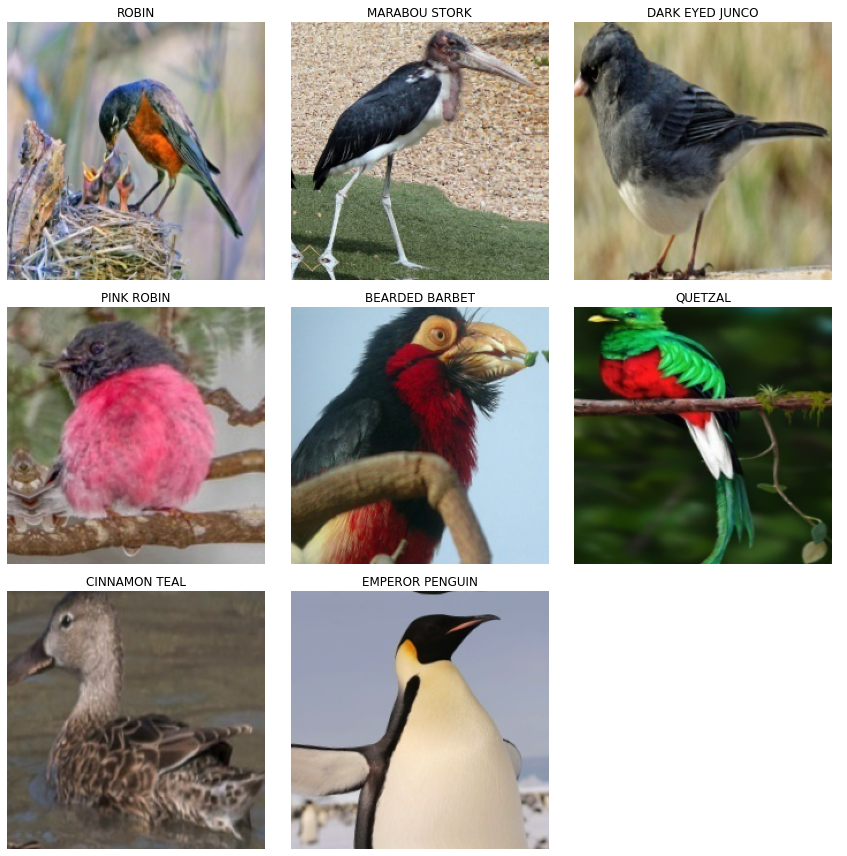

In [5]:
data.show_batch(3)

# Training on the data:

So now since I am not insecure that the pictures aren't of random indian dudes on facebook, I will define the model I will use to train this on!
The obvious choice to me is Resnets because they are absolutely awesome. 
Since Resnet18 is a comparitively shallow neural network (for random context: in 2010 an 8 layer neural net was massively deep), it will take less time to train. The [Resnets paper](https://arxiv.org/abs/1512.03385) states that CIFAR-10(20 layered) has a better accuracy than CIFAR-10(56 layered) which is absurd since our 56 layered is deeper, so will Resnet18 will work better than Resnet34?

Do deeper neural networks produce better results?
Check out the other the other notebook I coded about this model using Resnet34.

Anyway, so lets train the data:

In [6]:
learner = cnn_learner(data, models.resnet18, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [7]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.845841,0.599954,0.848889,05:16
1,1.568609,0.412185,0.888889,04:57
2,1.343137,0.306594,0.911111,04:45
3,0.994167,0.261606,0.926222,04:45
4,0.980593,0.230391,0.941333,04:49
5,0.879044,0.178941,0.959111,04:53
6,0.751863,0.156228,0.960889,04:57
7,0.722954,0.128890,0.964444,04:52
8,0.603668,0.119419,0.972444,04:55
9,0.612609,0.118769,0.971556,04:49


That was quick, we got an accuracy of about 97.1%, lets see if we could improve it real quick:

In [14]:
learner.fit_one_cycle(3, 1e-5, moms=(.99,.89))

epoch,train_loss,valid_loss,accuracy,time
0,0.599994,0.116635,0.973333,04:50
1,0.525234,0.114165,0.974222,04:51
2,0.493779,0.119619,0.973333,04:52


# Predicting on the Data:

Opening the pic:

In [18]:
imgpath = "../input/100-bird-species/test/AMERICAN COOT/2.jpg"
# Notice that its an American Coot

img = open_image(imgpath)

Lets finally predict:

AMERICAN COOT


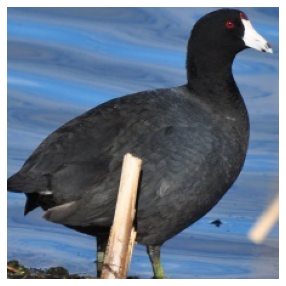

In [23]:
pred_class, pred_idx, y = learner.predict(img)

print(pred_class)
img.show(figsize=(5,5))

WE GOT IT RIGHT! Lets try another one:

BLACK SWAN


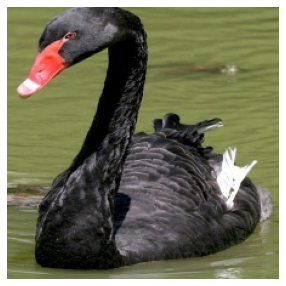

In [26]:
imgpath_2 = "../input/100-bird-species/test/BLACK SWAN/2.jpg"
# Notice, again, that its an American Coot

img_2 = open_image(imgpath_2)

pred_class, pred_idx, y = learner.predict(img_2)

print(pred_class)
img_2.show(figsize=(5,5))

Well, I did try and here we are with an accuracy of 97.3%, and a couple of correct prediction from amongst some hundreds of classes.

* Concluding: 
FastAI makes everything super easy and you should checkout the Library.

* Shameless SelfPromotion:
Do upvote if you found this helpful and felt motivated! :D